## Visualizing audio signals

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [4]:
sampling_freq, signal = wavfile.read('D:\\DTS AI 2019\\Datasets\\cats_dogs\\cat_1.wav')

In [5]:
print('\nSignal shape:', signal.shape)
print('Datatype:',signal.dtype)
print('Signal duration:', round(signal.shape[0]/float(sampling_freq),2),'seconds')


Signal shape: (179200,)
Datatype: int16
Signal duration: 11.2 seconds


In [6]:
signal =signal/np.power(2, 15)

In [7]:
signal = signal[:50]

In [8]:
time_axis = 1000*np.arange(0, len(signal),1)/float (sampling_freq)

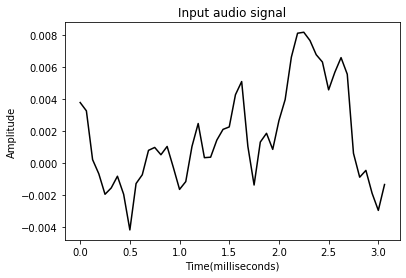

In [9]:
plt.plot(time_axis, signal, color='black')
plt.xlabel('Time(milliseconds)')
plt.ylabel('Amplitude')
plt.title('Input audio signal')
plt.show()

## Transforming audio signals to the frequency domain

In [10]:
sampling_freq, signal = wavfile.read('D:\\DTS AI 2019\\Datasets\\cats_dogs\\cat_1.wav')

In [11]:
signal = signal/np.power(2, 15)

In [12]:
len_signal = len(signal)

In [13]:
len_half = np.ceil((len_signal + 1)/2.0).astype(np.int)

In [14]:
freq_signal = np.fft.fft(signal)

In [15]:
freq_signal = abs(freq_signal[0:len_half])/len_signal

In [16]:
freq_signal **=2

In [17]:
len_fts = len(freq_signal)

In [18]:
if len_signal % 2:
    freq_signal[1:len_fts] *= 2
else:
    freq_signal[1:len_fts-1] *= 2

In [19]:
signal_power = 10*np.log10(freq_signal)

In [20]:
x_axis = np.arange(0, len_half, 1) * (sampling_freq/len_signal)/1000.0

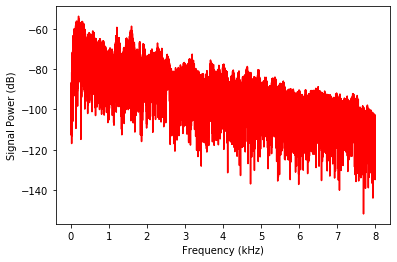

In [21]:
plt.figure()
plt.plot(x_axis, signal_power, color='red')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Signal Power (dB)')
plt.show()

## Generating audio signals

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write

In [23]:
output_file = 'genarated_audio.wav'

In [24]:
duration = 4
sampling_freq = 44100
tone_freq = 784
min_val = -4*np.pi
max_val = 4*np.pi

In [27]:
t = np.linspace(min_val, max_val, duration*sampling_freq)
signal = np.sin(2*np.pi *tone_freq*t)

In [28]:
noise = 0.5*np.random.rand(duration*sampling_freq)
signal +=noise

In [29]:
scaling_factor = np.power (2, 15) - 1
signal_normalized = signal/np.max(np.abs(signal))
signal_scaled = np.int16(signal_normalized*scaling_factor)

In [31]:
write(output_file, sampling_freq, signal_scaled)

In [32]:
signal = signal[:200]

In [33]:
time_axis = 1000*np.arange(0, len(signal), 1)/float(sampling_freq)

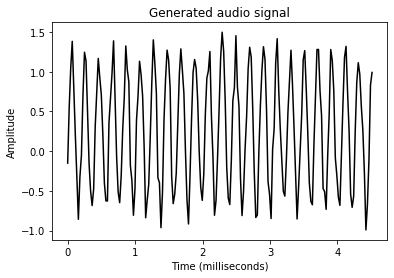

In [34]:
plt.plot(time_axis, signal, color='black')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Amplitude')
plt.title('Generated audio signal')
plt.show()